# Take Home Assignment 1

## Problem Statement
**What qualities of crude oil lead to pipeline accidents?**

Pipelines are generally regarded as a safe way to transport fuel, a far better alternative to tanker trucks or freight trains. But when a pipeline does fail, the consequences can be catastrophic; since 1986, pipeline accidents have killed more than 500 people, injured over 4,000 and cost nearly seven billion dollars in property damage. 

Using any resources available to you, can you determine *what phyisical chemical properties* of crude oil could be responsible for pipeline accidents?

---


### Scoping and Assumptions

To tackle this question, first I will make some qualifying assumption to scope the problem.
- We are going to focus on North America (with a slight preference to Canada)
- We are going to assume all North American crude oil has roughly the same chemistry and physical properties
- more here tbd

### Backgrounder - What is a pipeline accident and why do they happen?

To answer why pipeline accidents happen, first we have to figure out what we mean when we say "accident". We will start by analysing the [pipeline incident dataset](https://open.canada.ca/data/en/dataset/7dffedc4-23fa-440c-a36d-adf5a6cc09f1) provided by the National Energy Board. This will provide us of an idea of what kind of incidents occured during the reporting period (2008-2025). Given that this is a dataset of all pipelines, not just crude oil, we might also get some insight into how or why incidents concerning crude oil are different than other petrochemicals.

In [65]:
!pip install folium

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm

In [67]:
df_raw = pd.read_csv(filepath_or_buffer= 'data/in/pipeline-incidents-comprehensive-data.csv',encoding='utf-8', encoding_errors='ignore')

In [68]:
missing = df_raw.isnull().sum()
missing[missing>0]

Nearest Populated Centre                                                             2
Occurrence Date and Time                                                           458
Discovered Date and Time                                                             4
Detailed what happened                                                              27
Detailed why it happened                                                            28
                                                                                  ... 
Repair date                                                                       1743
Most recent inspection date for the failed equipment or component                 1626
Type of most recent inspection                                                    1627
Date of the most recent maintenance work for the failed equipment or component    1714
Most recent maintenance Type                                                      1668
Length: 66, dtype: int64

In [69]:
#do some data cleaning in the substances categories, this is not exactly perfect but good for a rough screen

df_raw['Substance carried'] = df_raw['Substance carried'].str.replace(r'.*Crude Oil.*', 'Crude Oil', regex=True)
df_raw['Substance carried'] = df_raw['Substance carried'].str.replace(r'.*Natural Gas.*', 'Natural Gas', regex=True)
df_raw['Substance carried'] = df_raw['Substance carried'].str.replace(r'^(?!.*(Crude Oil|Natural Gas)).*$', 'Other', regex=True)


#while there are other ways to interpolate data - for this project we are only going to look at pipelines where we know what they are carrying for sure
df = df_raw[df_raw['Substance carried'].notnull()].copy()

<Axes: xlabel='Number of Incidents', ylabel='Substance carried'>

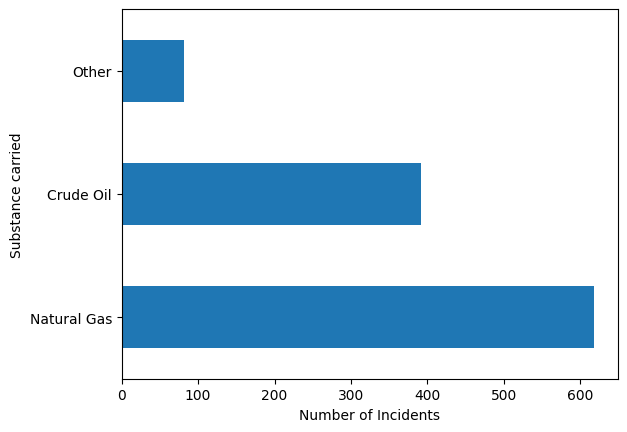

In [75]:
df['Substance carried'].value_counts().plot(xlabel='Number of Incidents',kind='barh')

In [71]:
#instantiate map and get center
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
pipeline_map = fm.Map(location=map_center, zoom_start=3.5)

#plot incidents on map
for _, row in df[df['Substance carried']=='Crude Oil'].iterrows():
    fm.Marker([row['Latitude'], row['Longitude']]).add_to(pipeline_map)

#display map
display(pipeline_map)